<a href="https://colab.research.google.com/github/rrizwan98/Natural-Language-Processing-NLp-/blob/main/nlp_Arabic_language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
file_name="/content/drive/My Drive/arabic hard.zip"
with ZipFile(file_name,'r')as zip:
  zip.extractall()
  print('raza')

raza


In [ ]:
from zipfile import ZipFile
file_name="/content/drive/My Drive/balanced-reviews.zip"
with ZipFile(file_name,'r')as zip:
  zip.extractall()
  print('raza')

raza


In [ ]:
from fastai import *
from fastai.text import * 
from IPython.display import display


In [ ]:
Path('data/hard/').mkdir(parents=True, exist_ok=True)
!cp '../input/balanced-reviews/balanced-reviews-utf8.tsv' data/hard/balanced-reviews.tsv

cp: cannot stat '../input/balanced-reviews/balanced-reviews-utf8.tsv': No such file or directory


In [ ]:
path=Path('data/hard/')
df_ar = pd.read_csv('/content/balanced-reviews-utf8.tsv', delimiter='\t')
df_ar.head() # the first review sounds positive but rating is 2 (-ve). Reviewer's choice!

,no,Hotel name,rating,user type,room type,nights,review
0,2,فندق 72,2,مسافر منفرد,غرفة ديلوكس مزدوجة أو توأم,أقمت ليلة واحدة,“ممتاز”. النظافة والطاقم متعاون.
1,3,فندق 72,5,زوج,غرفة ديلوكس مزدوجة أو توأم,أقمت ليلة واحدة,استثنائي. سهولة إنهاء المعاملة في الاستقبال. ل...
2,16,فندق 72,5,زوج,-,أقمت ليلتين,استثنائي. انصح بأختيار الاسويت و بالاخص غرفه ر...
3,20,فندق 72,1,زوج,غرفة قياسية مزدوجة,أقمت ليلة واحدة,“استغرب تقييم الفندق كخمس نجوم”. لا شي. يستحق ...
4,23,فندق 72,4,زوج,غرفة ديلوكس مزدوجة أو توأم,أقمت ليلتين,جيد. المكان جميل وهاديء. كل شي جيد ونظيف بس كا...


In [ ]:
df_ar = df_ar[['rating', 'review']] # we are interested in rating and review only
# code rating as +ve if > 3, -ve if less, no 3s in dataset 
df_ar['rating'] = df_ar['rating'].apply(lambda x: -1 if x < 3 else 1)
# rename columns to fit default constructor in fastai
df_ar.columns = ['label', 'text']
df_ar.head()

,label,text
0,-1,“ممتاز”. النظافة والطاقم متعاون.
1,1,استثنائي. سهولة إنهاء المعاملة في الاستقبال. ل...
2,1,استثنائي. انصح بأختيار الاسويت و بالاخص غرفه ر...
3,-1,“استغرب تقييم الفندق كخمس نجوم”. لا شي. يستحق ...
4,1,جيد. المكان جميل وهاديء. كل شي جيد ونظيف بس كا...


In [ ]:
df_valid = df_ar.sample(21140, replace = False) # 20% for validation
df_valid['is_valid'] = True
df_train = df_ar.drop(df_valid.index)
df_train['is_valid'] = False

df_all = pd.concat([df_train, df_valid])
df_all.head()

,label,text,is_valid
0,-1,“ممتاز”. النظافة والطاقم متعاون.,False
1,1,استثنائي. سهولة إنهاء المعاملة في الاستقبال. ل...,False
2,1,استثنائي. انصح بأختيار الاسويت و بالاخص غرفه ر...,False
3,-1,“استغرب تقييم الفندق كخمس نجوم”. لا شي. يستحق ...,False
4,1,جيد. المكان جميل وهاديء. كل شي جيد ونظيف بس كا...,False


In [ ]:
# write to csv (overwrites by default)
df_all.to_csv(path/'hard_text.csv', index=False)

In [ ]:
df = pd.read_csv(path/'hard_text.csv')
df.head()

,label,text,is_valid
0,-1,“ممتاز”. النظافة والطاقم متعاون.,False
1,1,استثنائي. سهولة إنهاء المعاملة في الاستقبال. ل...,False
2,1,استثنائي. انصح بأختيار الاسويت و بالاخص غرفه ر...,False
3,-1,“استغرب تقييم الفندق كخمس نجوم”. لا شي. يستحق ...,False
4,1,جيد. المكان جميل وهاديء. كل شي جيد ونظيف بس كا...,False


In [ ]:
x=df.drop(['label'],axis=1)
y=df['label']
x

,text,is_valid
0,“ممتاز”. النظافة والطاقم متعاون.,False
1,استثنائي. سهولة إنهاء المعاملة في الاستقبال. ل...,False
2,استثنائي. انصح بأختيار الاسويت و بالاخص غرفه ر...,False
3,“استغرب تقييم الفندق كخمس نجوم”. لا شي. يستحق ...,False
4,جيد. المكان جميل وهاديء. كل شي جيد ونظيف بس كا...,False
...,...,...
105693,ضعيف جداً. . ضعف في التكيف ضعف في طريقهالمعامل...,True
105694,مخيب للأمل. نظافة الشاطئ. غلاء السعر مقارنة با...,True
105695,“ممتاز”. خدمة ممتازة.,True
105696,“كاد ان يقتلني لو لا رحمة الله ...”. موقعه بال...,True


In [ ]:
Path('models/').mkdir(parents=True, exist_ok=True)
!cp -a '../input/model45_30_4/lm_best.pth' models/
!cp '../input/model45_30_4/itos.pkl' models/

cp: cannot stat '../input/model45_30_4/lm_best.pth': No such file or directory
cp: cannot stat '../input/model45_30_4/itos.pkl': No such file or directory


In [ ]:
Path('models/').absolute() # get absolute path od model files

PosixPath('/content/models')

In [ ]:
pretrained_fnames=['/kaggle/working/models/lm_best','/kaggle/working/models/itos']

In [ ]:
# Language model data
data_lm = TextLMDataBunch.from_csv(path, 'hard_text.csv')
# Classifier model data
data_clas = TextClasDataBunch.from_csv(path, 'hard_text.csv', vocab=data_lm.train_ds.vocab, bs=64, num_workers=0)



TextLMDataBunch;

Train: LabelList (84558 items)
x: LMTextList
xxbos مخيب للأمل . اعجبني القرب من الحرم xxunk الاسره والمخدات . الذي لم يعجبني عدم وجود مواقف للسياره وهم وعدو بذلك النظافه متدنيه وخاصه في فرشة الممرات,xxbos مخيب للأمل . موقع الفندق . النظافة,xxbos “ سيئ ” . مستوى النظافه فى منتهى السوء ولا يستحق المقابل المادى المدفوع فيه . سوء النظافه,xxbos “ اقامه ممتعه ومريحه وارجو تحسين المصعد xxunk ” . الاستقبال كان جيد . الافطار افضل الاهتمام به علما بأني لم اطلب وجبه الافطار مع الحجز ولكن اطلعت على البوفيه وكان غير جيد,xxbos “ تجربه سيئه ومخيفه ” . الاثاث والديكور والمسبح . عمال الصيانه تركوا فتحه في الحوش xxunk يقارب الثلاث أمتار بدون تغطيه او تحذير وكاد ابني الصغير يسقط لولا حفظ الله ولله الحمد
y: LMLabelList
,,,,
Path: data/hard;

Valid: LabelList (21140 items)
x: LMTextList
xxbos ضعيف جداً. ريحه معفنه مرا دخلت وانا حاجز وبعد xxunk الريحة ع طول خرجة منه ورجعت كل مافي xxunk ولا فيه خدمة مواقف انا متعود افتح باب السيارة xxunk داخل الفندق ويجي واحد من الفندق xxunk xxunk هذا الفند

In [ ]:
print(data_lm)

TextLMDataBunch;

Train: LabelList (84558 items)
x: LMTextList
xxbos مخيب للأمل . اعجبني القرب من الحرم xxunk الاسره والمخدات . الذي لم يعجبني عدم وجود مواقف للسياره وهم وعدو بذلك النظافه متدنيه وخاصه في فرشة الممرات,xxbos مخيب للأمل . موقع الفندق . النظافة,xxbos “ سيئ ” . مستوى النظافه فى منتهى السوء ولا يستحق المقابل المادى المدفوع فيه . سوء النظافه,xxbos “ اقامه ممتعه ومريحه وارجو تحسين المصعد xxunk ” . الاستقبال كان جيد . الافطار افضل الاهتمام به علما بأني لم اطلب وجبه الافطار مع الحجز ولكن اطلعت على البوفيه وكان غير جيد,xxbos “ تجربه سيئه ومخيفه ” . الاثاث والديكور والمسبح . عمال الصيانه تركوا فتحه في الحوش xxunk يقارب الثلاث أمتار بدون تغطيه او تحذير وكاد ابني الصغير يسقط لولا حفظ الله ولله الحمد
y: LMLabelList
,,,,
Path: data/hard;

Valid: LabelList (21140 items)
x: LMTextList
xxbos ضعيف جداً. ريحه معفنه مرا دخلت وانا حاجز وبعد xxunk الريحة ع طول خرجة منه ورجعت كل مافي xxunk ولا فيه خدمة مواقف انا متعود افتح باب السيارة xxunk داخل الفندق ويجي واحد من الفندق xxunk xxunk هذا الفند

In [ ]:
print(data_clas)

TextClasDataBunch;

Train: LabelList (84558 items)
x: TextList
xxbos “ بوخالد العين ” . الموقع كبر مساحة الشقة . التأخير في إجراءات الدخول بس للأمانة كان عيد وزحمة,xxbos ضعيف جداً. لا يوجد . النظافه و التكيف,xxbos جيد . الهدوء و النظافه . البوفيه كان أقل من المستوى العادي,xxbos “ جمال المكان وطيب المعاملة ” . بنظافة المكان والمعاملة الطيبة من قبل الموظفين .,xxbos جيد جداً. الهدوء والكل يقدمو المساعده .
y: CategoryList
1,-1,1,1,1
Path: data/hard;

Valid: LabelList (21140 items)
x: TextList
xxbos جيد . . تم الغاء حجزين سابقين,xxbos “ اكثر من ر xxrep 9 ا ئع ” . كل شي . لاشي,xxbos “ فندق سيء , لا يواكب موقعه ” . . الفندق قديم جدا , و النظافه جدا سيئه و مليء بالحشرات,xxbos مخيب للأمل . . لم يوجد مواقف xxunk للفندق,xxbos ضعيف جداً. . ازعاج اثناء النومعدم xxunk السيارات سيئه جدا وضيقه
y: CategoryList
1,1,-1,-1,-1
Path: data/hard;

Test: None


In [ ]:
data_lm.save()
data_clas.save()


In [ ]:
data_lm

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


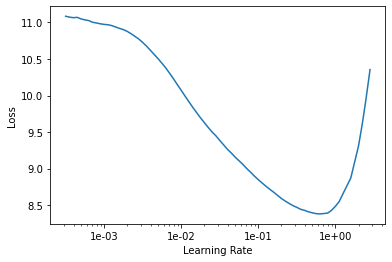

In [ ]:
learn=language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5) # was .5
learn.lr_find(start_lr = slice(10e-7,10e-5),end_lr=slice(0.1,10))#start_lr = slice(10e-7,10e-5),end_lr=slice(0.1,10))
learn.recorder.plot(skip_end=10)

In [ ]:
learn.fit_one_cycle(1, 2e-2)

epoch,train_loss,valid_loss,accuracy,time
0,5.570888,5.271931,0.230140,03:02


In [ ]:
learn.unfreeze()
learn.fit_one_cycle(3, 2e-2)

epoch,train_loss,valid_loss,accuracy,time
0,5.205563,4.996970,0.244500,03:38
1,4.884339,4.733696,0.260169,03:44
2,4.515150,4.622321,0.268755,03:46


In [ ]:
learn.predict("كخمس نجوم”. لا شي. يستحق ", n_words=10)
# first amount of words (here 10), the next 10 target words (actual) and the ones predicted.
#learn.show_results(max_len = 10)

'كخمس نجوم”. لا شي. يستحق  الاوتيل خمس نجوم بالكثير الغرفه للزبائن شكلا اصواتهم لاسف !'

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data=x.apply(le.fit_transform)
data

,text,is_valid
0,98439,0
1,3910,0
2,3066,0
3,47230,0
4,12602,0
...,...,...
105693,58330,1
105694,41971,1
105695,77753,1
105696,3281,1
